In [1]:
# setup blackjack gym environment
import gymnasium

env = gymnasium.make("Blackjack-v1")

In [2]:
class RandomAgent:
    
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
 
        return self.env.action_space.sample()

agent = RandomAgent(env)

In [13]:
from tqdm import tqdm

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):
    
    # reset environment to a random state
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    terminated = False
    
    while not terminated:
        
        action = agent.get_action(state)    
        next_state, reward, terminated, truncated, info = env.step(action)
               
        if reward == -1:
            penalties += 1

        state = next_state
        epochs += 1
    
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|██████████| 100/100 [00:00<00:00, 6090.88it/s]


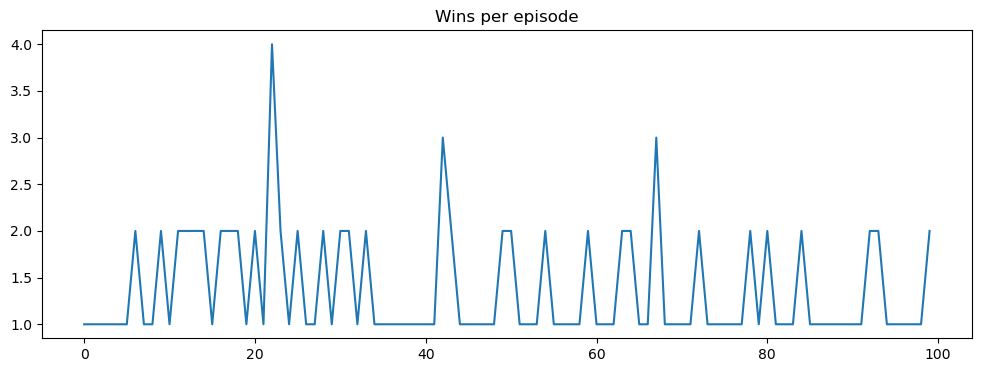

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Wins per episode")
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

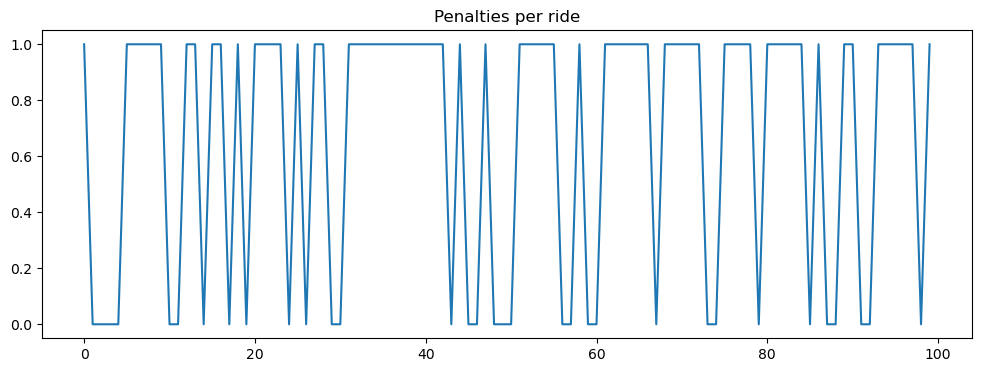

In [15]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per episode")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()

In [16]:
print(f'Avg steps to complete ride: {np.array(timesteps_per_episode).mean()}')
print(f'Avg penalties to complete ride: {np.array(penalties_per_episode).mean()}')

Avg steps to complete ride: 1.37
Avg penalties to complete ride: 0.67
